# Random Forest + CART Models

## Depedencies + Loading in Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# Load in pre-cleaned data set (see the Data Cleaning notebook)
data = pd.read_csv("/work/filtered_data.csv")
data.head()

,startingAirport,destinationAirport,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,seatsRemaining,totalTravelDistance,segmentsArrivalAirportCode,...,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,bookingClassCode,daysTillFlight,departureDayOfWeek,departureHour,arrivalDayOfWeek,arrivalHour
0,LAX,ORD,1,False,False,True,236.28,9,1745.0,ORD,...,Boeing 737-900,14640,1745,coach,W,27,5,23,6,6
1,LAX,ORD,0,False,False,True,305.12,6,1745.0,ORD,...,Boeing 757-300,14880,1745,coach,Q,3,1,10,1,16
2,LAX,ORD,0,False,False,True,322.79,5,1745.0,ORD,...,Boeing 737-800,14700,1745,coach,M,1,1,13,1,19
3,LAX,ORD,0,False,False,True,459.53,7,1745.0,ORD,...,Boeing 737-800,14640,1745,coach,H,8,0,7,0,13
4,LAX,DFW,0,False,False,True,252.09,7,1238.0,DFW,...,Airbus A321,10860,1238,coach,L,5,5,18,5,23


## Dummy Encoding Data + Train/Test Split

In [3]:
# Dummy encoding the dataset
df_encoded = pd.get_dummies(data)
df_encoded = df_encoded.dropna()
df_encoded = df_encoded.astype('float64')
df_encoded

,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,seatsRemaining,totalTravelDistance,segmentsDurationInSeconds,segmentsDistance,daysTillFlight,...,bookingClassCode_Q,bookingClassCode_R,bookingClassCode_S,bookingClassCode_T,bookingClassCode_U,bookingClassCode_V,bookingClassCode_W,bookingClassCode_X,bookingClassCode_Y,bookingClassCode_Z
0,1.0,0.0,0.0,1.0,236.28,9.0,1745.0,14640.0,1745.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,305.12,6.0,1745.0,14880.0,1745.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,322.79,5.0,1745.0,14700.0,1745.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,459.53,7.0,1745.0,14640.0,1745.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,252.09,7.0,1238.0,10860.0,1238.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25624,1.0,0.0,0.0,1.0,115.35,7.0,2414.0,18300.0,2414.0,31.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25625,0.0,0.0,0.0,1.0,290.23,7.0,1193.0,10620.0,1193.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25626,0.0,0.0,0.0,1.0,245.58,7.0,1745.0,14940.0,1745.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25627,0.0,1.0,0.0,1.0,171.16,7.0,1847.0,15480.0,1847.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Train/test split
X = df_encoded.drop('baseFare', axis=1)
y = df_encoded['baseFare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Define custom OSR2 function 
def OSR2_tree(model, X_test, y_test, y_train):

    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)

    return (1 - SSE/SST)

## Basic Random Forest Model

In [6]:
# Initialize RandomForestRegressor with default parameters
rf_regressor = RandomForestRegressor(min_samples_leaf=5, n_estimators = 500, random_state=42)

# Fit the regressor model to the training data
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=5, n_estimators=500, random_state=42)

In [7]:
# Predict on the test data
y_pred = rf_regressor.predict(X_train)

# Calculate accuracy using r2_score
accuracy = r2_score(y_train, y_pred)

# Print the R2
print("R-squared Score:", accuracy)

R-squared Score: 0.9681218584975783


In [8]:
# Calculate RMSE
y_pred = rf_regressor.predict(X_test)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))

# Calculate OSR2
osr2 = OSR2_tree(rf_regressor, X_test, y_test, y_train)

# Print the RMSE and OSR2
print("RMSE:", rmse)
print("OSR2:", osr2)

RMSE: 36.70317845492036
OSR2: 0.9364690980314077


## Cross-Validated Random Forest Model

In [6]:
# Performing cross validation to select best max_features
len_cols = len(X_train.columns)
grid_values = {'max_features': np.linspace(1,len_cols,len_cols, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [42]
              }

rf2 = RandomForestRegressor()
cv = KFold(n_splits=5,random_state=42,shuffle=True)
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='r2', cv=cv,verbose=0)
rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_)

{'max_features': 100, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 42}


In [12]:
# Calculating performance metrics for cross-validated RF model
y_pred = rf_cv.predict(X_train)
print('R2: ', r2_score(y_train, y_pred))

y_pred_test = rf_cv.predict(X_test)
print('OSR2:', OSR2_tree(rf_cv, X_test, y_test, y_train))

rmse = np.sqrt(np.mean((y_test - y_pred_test) ** 2))
print("RMSE: ", rmse)

R2:  0.9681218584975783
OSR2: 0.9364690980314077
RMSE:  36.70317845492036


In [8]:
# Calculating importance scores for each feature
importance = pd.DataFrame({'Feature' : X_train.columns,
              'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1)

importance.head(101)

,Feature,Importance score
0,elapsedDays,0.0
1,isBasicEconomy,10.1
2,isRefundable,0.0
3,isNonStop,0.0
4,seatsRemaining,0.3
...,...,...
95,bookingClassCode_V,0.6
96,bookingClassCode_W,0.5
97,bookingClassCode_X,0.0
98,bookingClassCode_Y,9.7


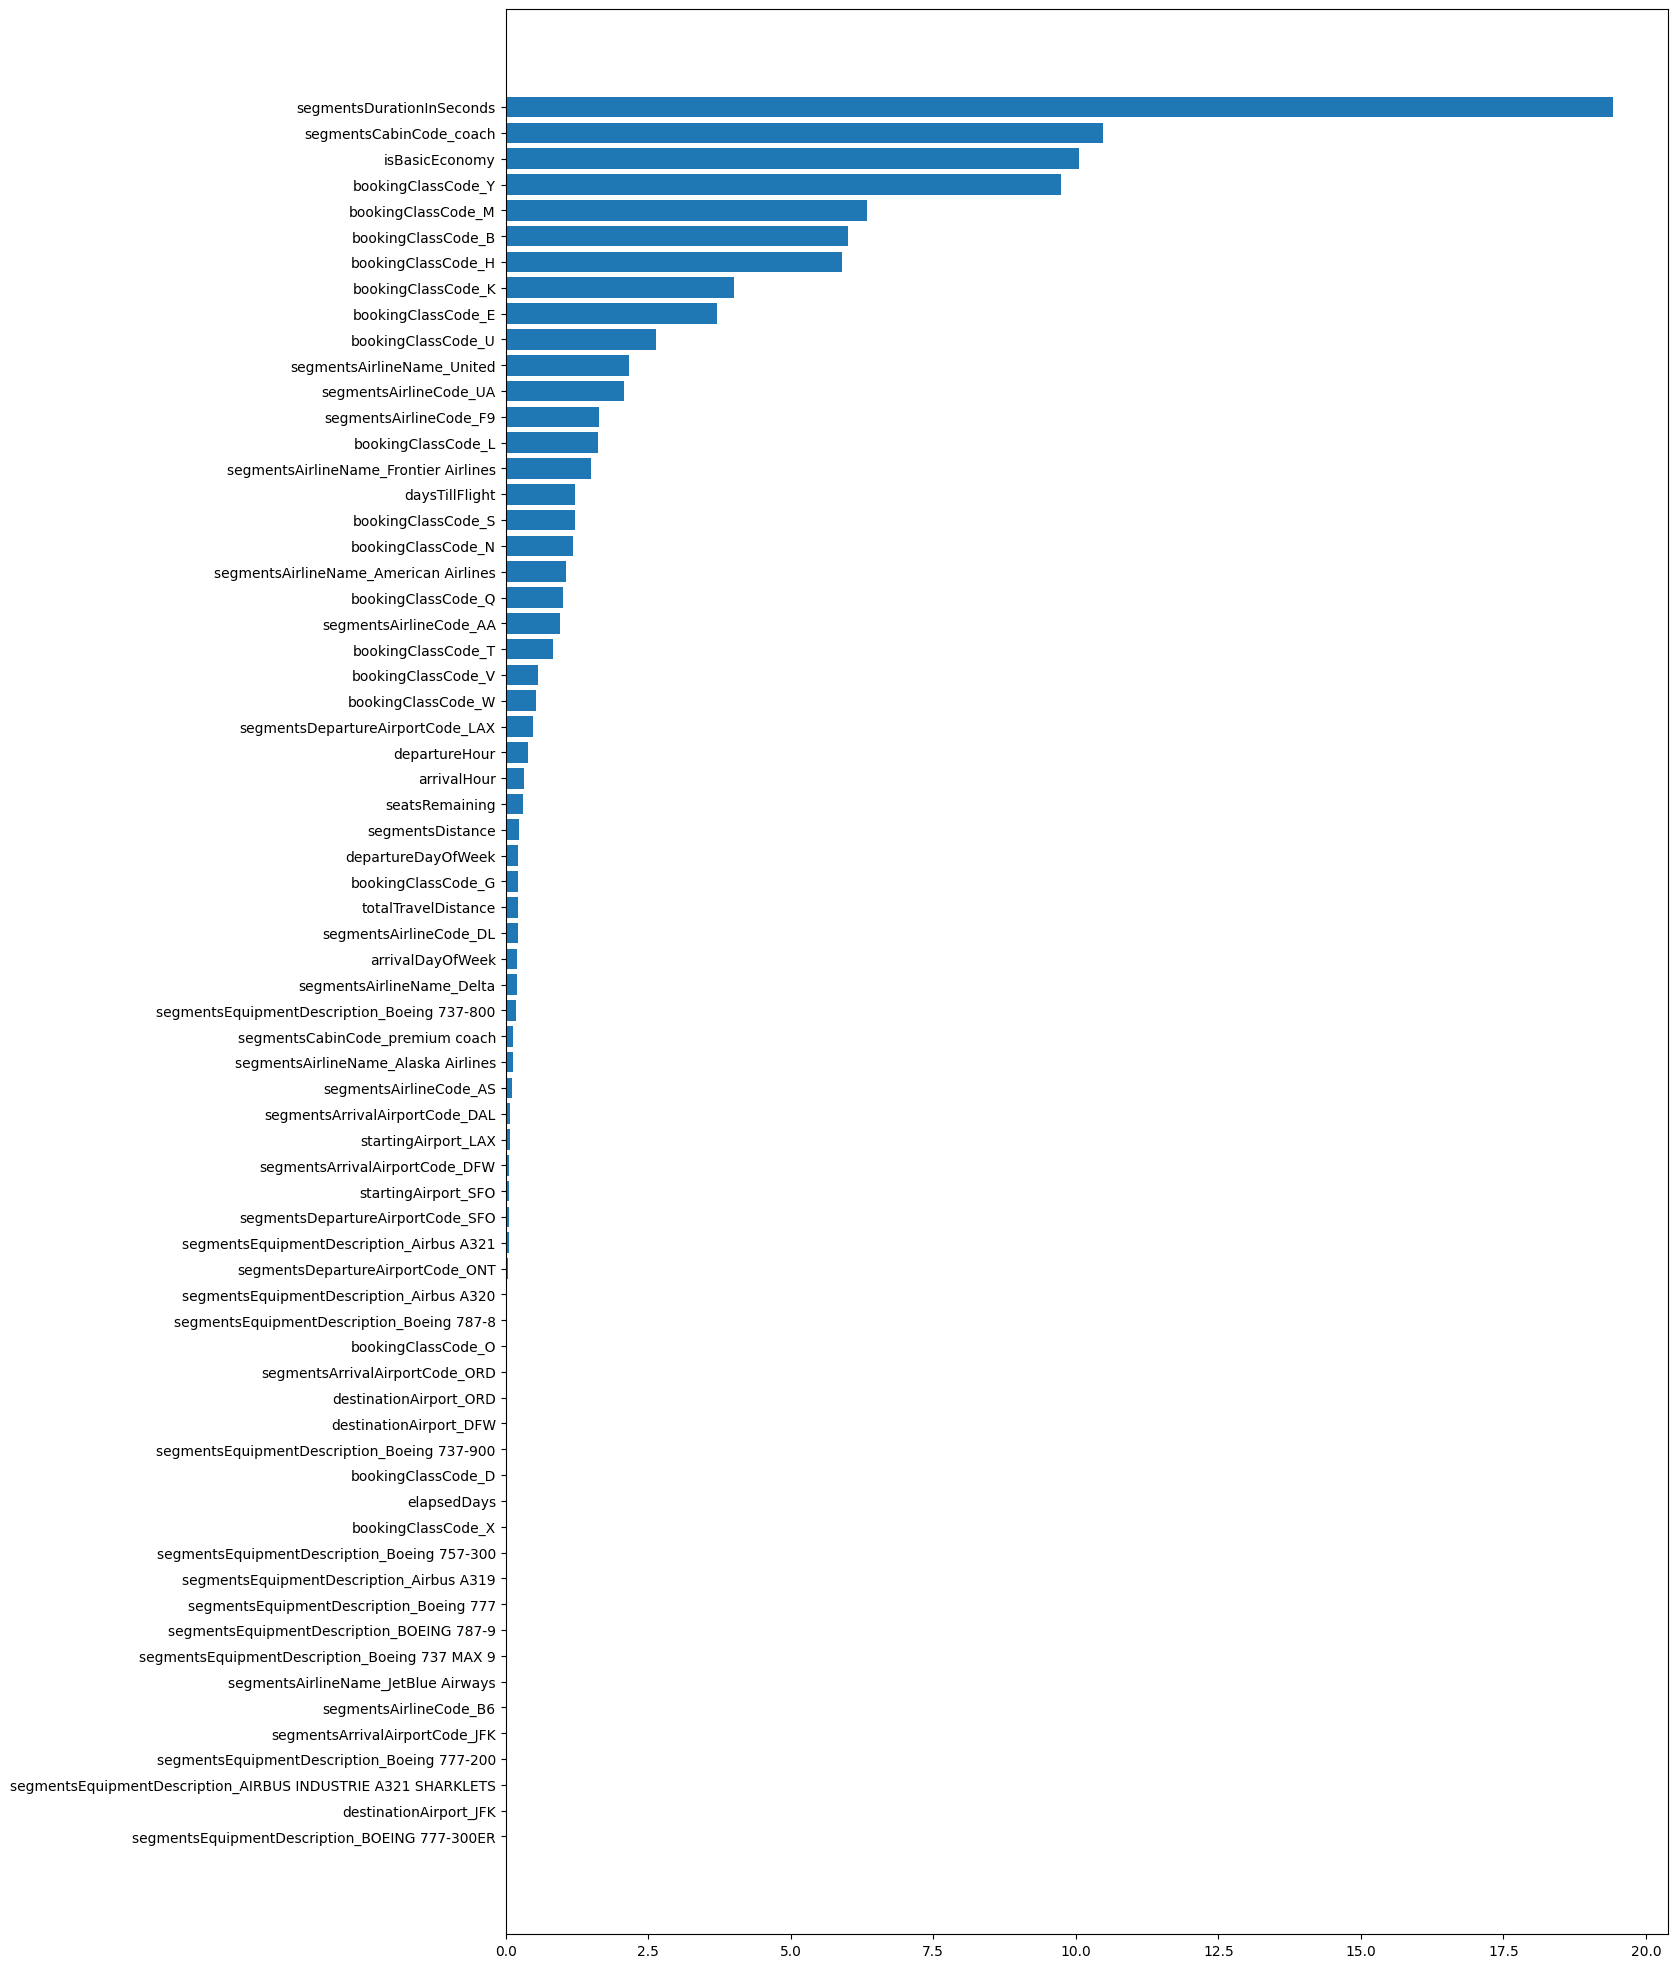

In [15]:
# Displaying importance scores for each feature via bar plot
features = pd.DataFrame(data = {"features": X_train.columns, "importance": rf_cv.best_estimator_.feature_importances_})
features = features.sort_values(by = "importance")
features_gt_zero = features[features["importance"] > 0]
plt.figure(figsize=(15, 25))
plt.barh(features_gt_zero["features"], sorted(100*features_gt_zero["importance"], reverse=False))
plt.show()

## Cross-Validated Regression Tree Model

In [27]:
# Performing cross-validation to see what the best ccp_alpha value would be for the decision tree regressor
grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [42]}

dtr = DecisionTreeRegressor()
dtr_cv_acc = GridSearchCV(dtr, param_grid = grid_values, scoring = 'r2', cv=10, verbose=1)
dtr_cv_acc.fit(X_train, y_train)
print('Grid best parameter ccp_alpha (max. accuracy): ', dtr_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtr_cv_acc.best_score_)
print("Grid best parameters: ", dtr_cv_acc.best_params_)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits
Grid best parameter ccp_alpha (max. accuracy):  0.058
Grid best score (accuracy):  0.9381805864102042
Grid best parameters:  {'ccp_alpha': 0.058, 'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 20, 'random_state': 42}


In [18]:
dtr = DecisionTreeRegressor(ccp_alpha=0.058, max_depth=30, min_samples_leaf=5, min_samples_split = 20, random_state=42)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

# R2
y_pred_train = dtr.predict(X_train)
r2 = r2_score(y_train, y_pred_train)

# Calculate rmse
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))

# Calculate OSR2
osr2 = OSR2_tree(dtr, X_test, y_test, y_train)

# Print the rmse and osr2
print("R2:", r2)
print("RMSE:", rmse)
print("OSR2:", osr2)

R2: 0.9642005209336554
RMSE: 36.88757644216784
OSR2: 0.9358291317317198


Node count = 1747


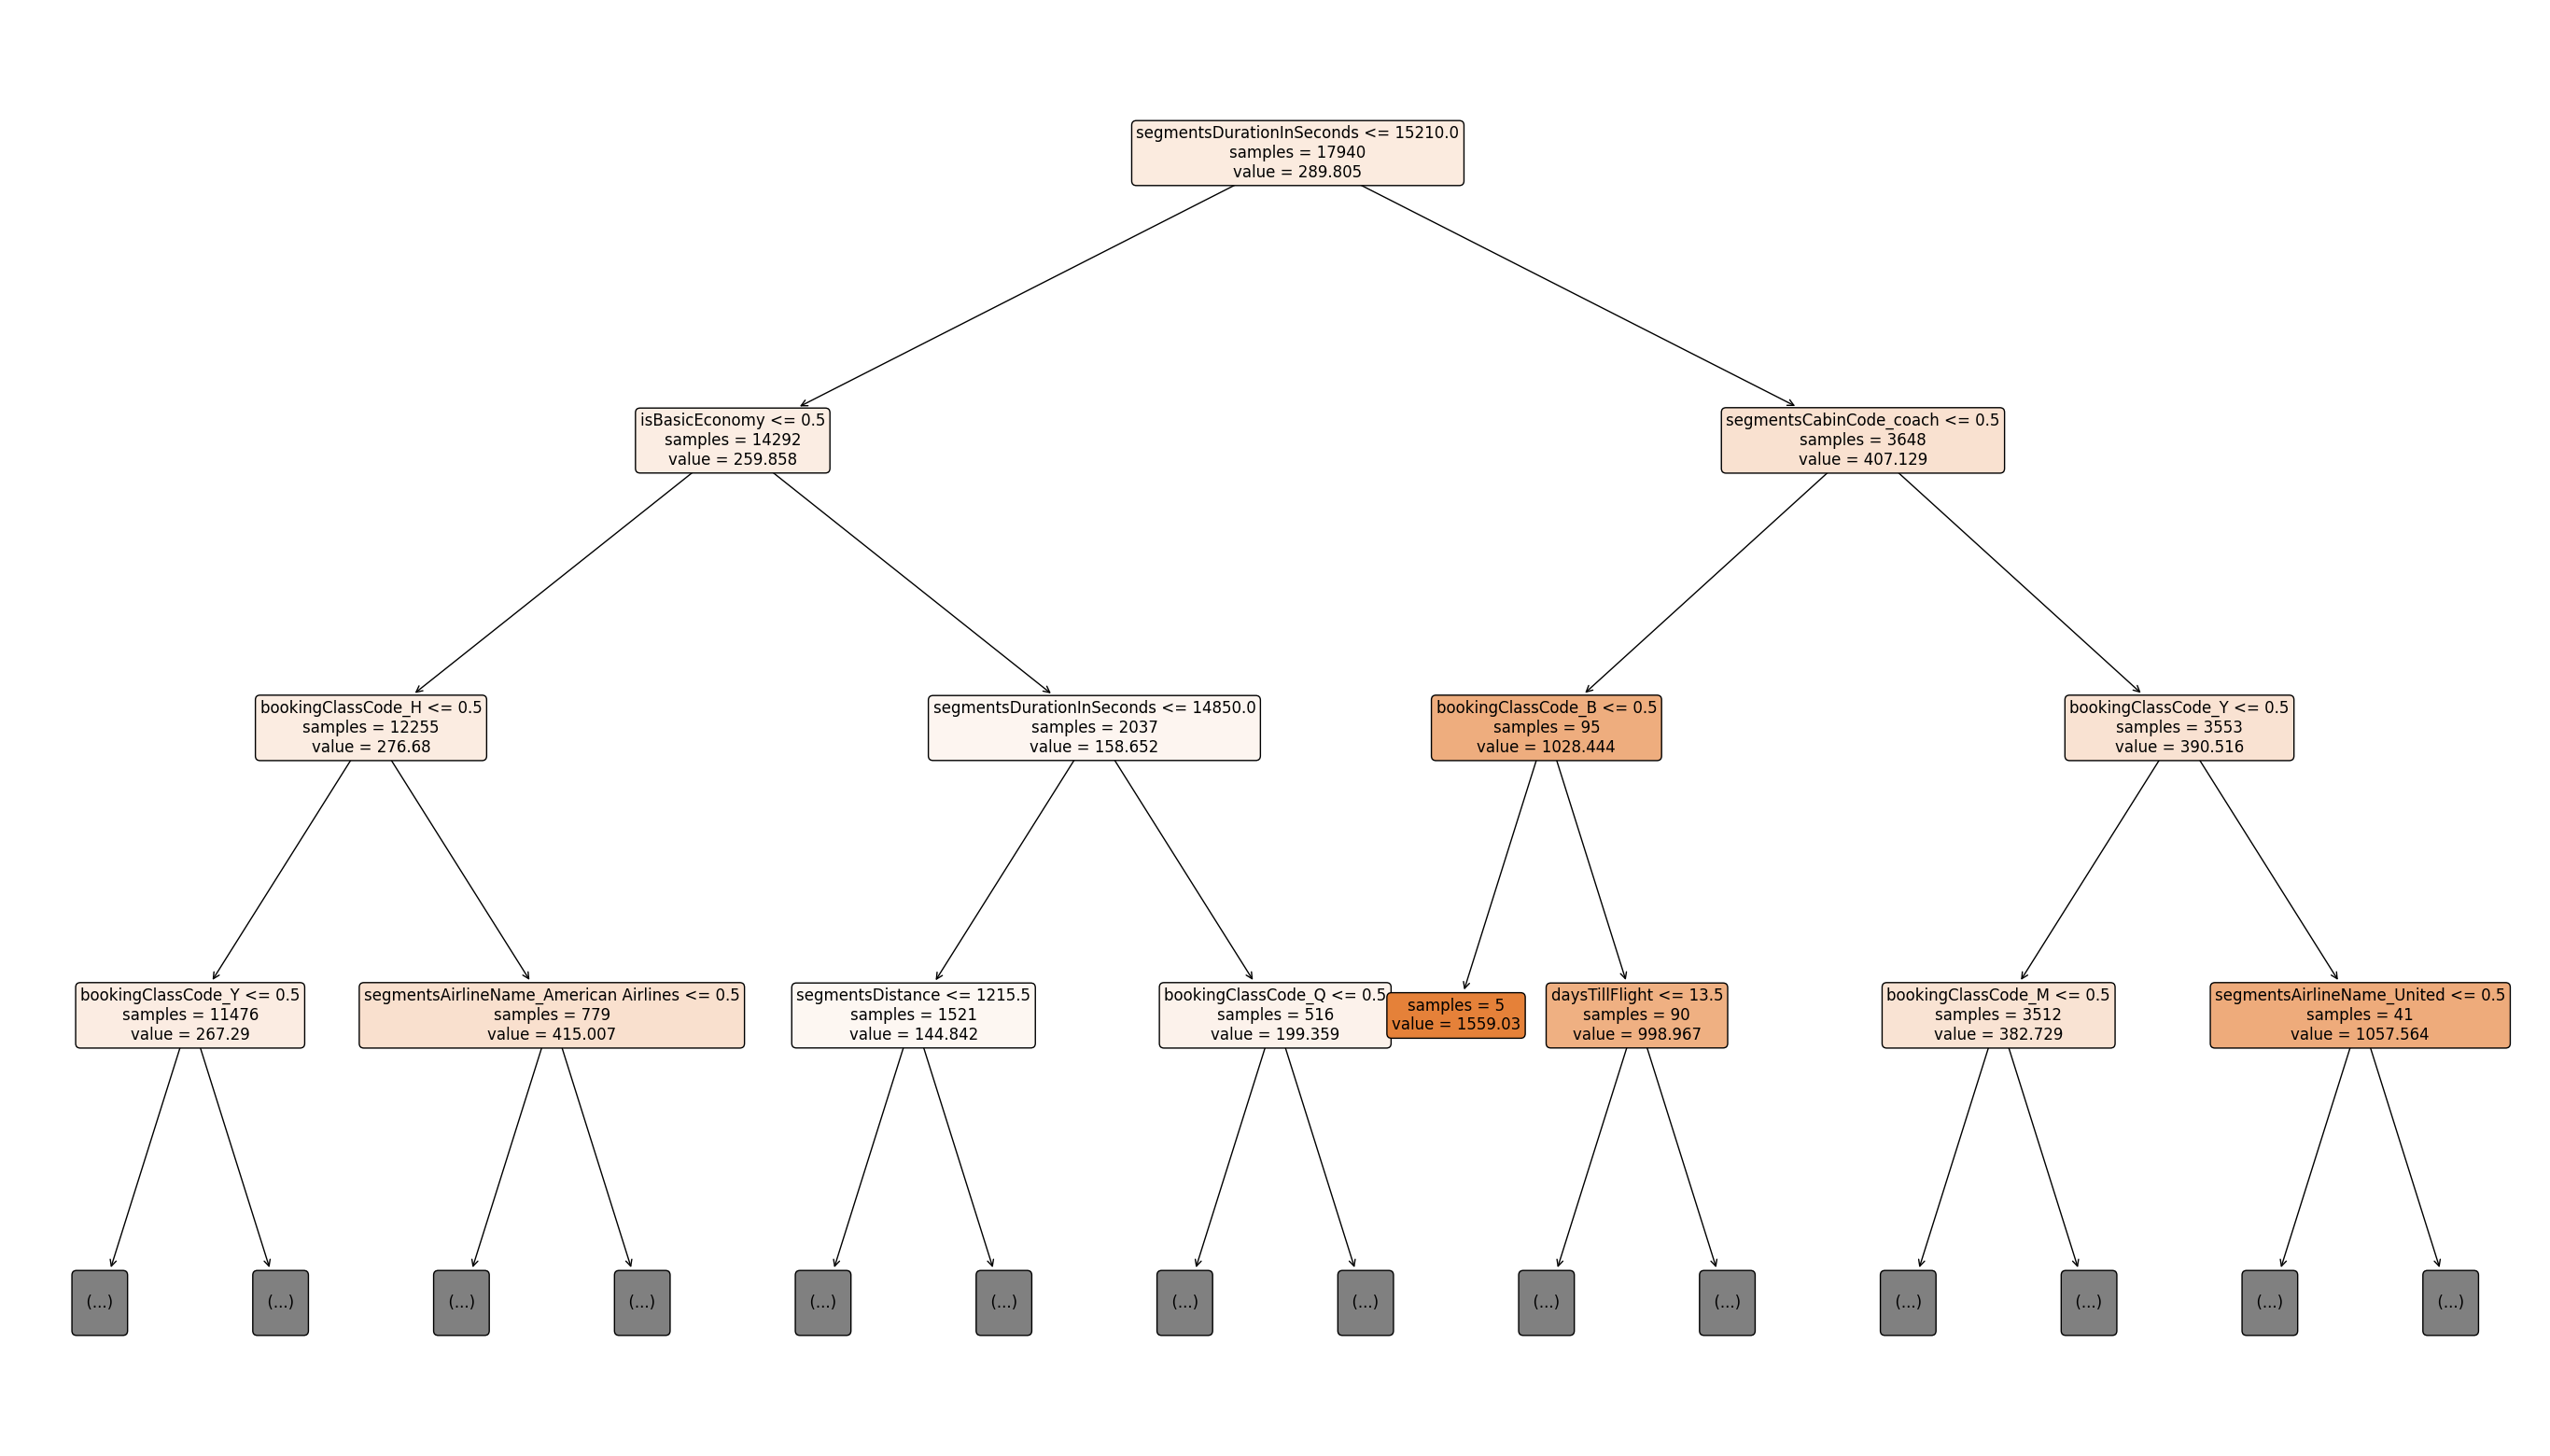

In [26]:
# Displaying regression tree
print('Node count =', dtr.tree_.node_count)
plt.figure(figsize=(35, 20))
plot_tree(dtr,
          feature_names=X_train.columns,
          class_names=['0','1'],
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12,
          max_depth=3)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=36e46b6c-b77a-4f8c-a857-c3dc2e354e3d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>